# <en><center>Characterizing</center></en>

## Table of Contents
- [Calculating the Mean](#Calculating-the-Mean)
- [Calculating the Median](#Calculating-the-Median)
- [Calculating the Mode](#Calculating-the-Mode)
- [Measures of Width and Balance](#Measures-of-Width-and-Balance)
- [Percentiles](#Percentiles)
- [Multivariate Distributions](#Multivariate-Distributions)
- [Summary](#Summary)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#### Dataset

In [3]:
data = np.loadtxt("C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\\
Characterising1D\\dataset.txt")

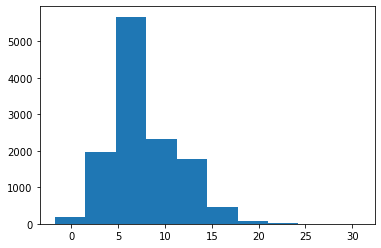

In [5]:
plt.hist(data);

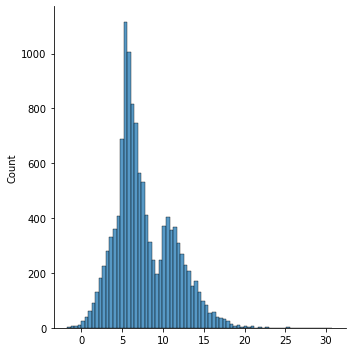

In [7]:
sns.displot(data)

## Calculating the Mean

In [ ]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed/ len(xs)
print(get_mean([3,5,2,6]))


numpy average method also accepts an argument for weights. This makes it more flexible.

In [13]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


## Calculating the Median

In [16]:
def get_median(xs):
    mid = len(xs)//2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid-1 : mid + 1])
    
print(get_median([7,7,4,3,2,9,5]))

5


In [19]:
median = np.median(data)
print(median)

6.7325


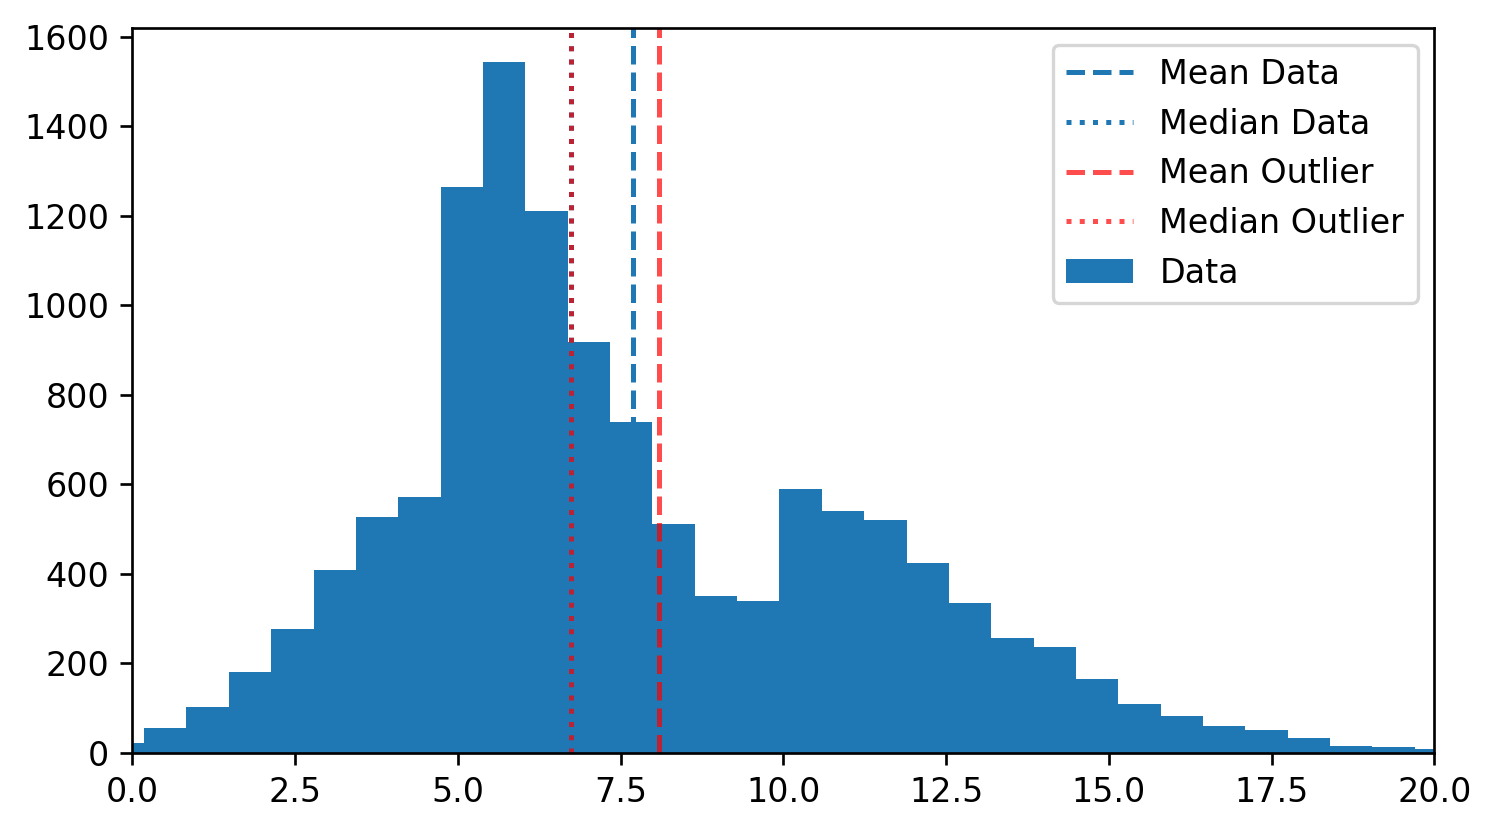

In [29]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

## Calculating the Mode

In [23]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts = True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,7,4,3,7,9,9,3,2,3,5,5,5,3]))

3


In [24]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [30]:
hist, edges = np.histogram(data, bins = 100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


There is a difference between the modes: 5.519 and 5.223165.
- We use a KDE plot to find the answer.
- The KDE is insensitive to the number of bins in the histogram plot.

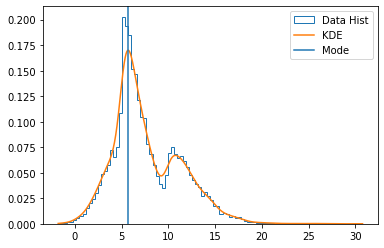

In [32]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins = 100, density = True, label = "Data Hist", histtype = "step")
plt.plot(xvals, yvals, label = "KDE")
plt.axvline(mode, label = "Mode")
plt.legend();

## Measures of Width and Balance

- Variance
- Standard Deviation
- Skewness
- Kurtosis

### Variance

In [33]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean) **2
    return summed / (len(xs) - 1)

In [34]:
variance = np.var([1,2,3,4,5])
print(variance)

2.0


In [36]:
variance = np.var([1,2,3,4,5], ddof = 1) # degrees of freedom
print(variance)

2.5


In [38]:
variance = np.var(data, ddof = 1) # degrees of freedom
print(variance)

13.137626632694301


### Standard Deviation

In [37]:
std = np.std(data)

In [39]:
print(std, std**2)

3.6244414221454435 13.136575622563685


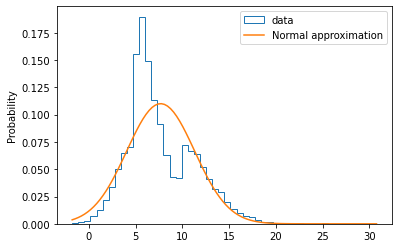

In [42]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc = mean, scale = std)

plt.hist(data, bins = 50, density = True, histtype = "step", label = "data")
plt.plot(xs, ys, label = "Normal approximation")
plt.legend()
plt.ylabel("Probability");

### Skewness

In [43]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed/ (len(xs)))/ (var ** 1.5)

print(get_skewness([1,2,3,4,5]))

0.0


In [44]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


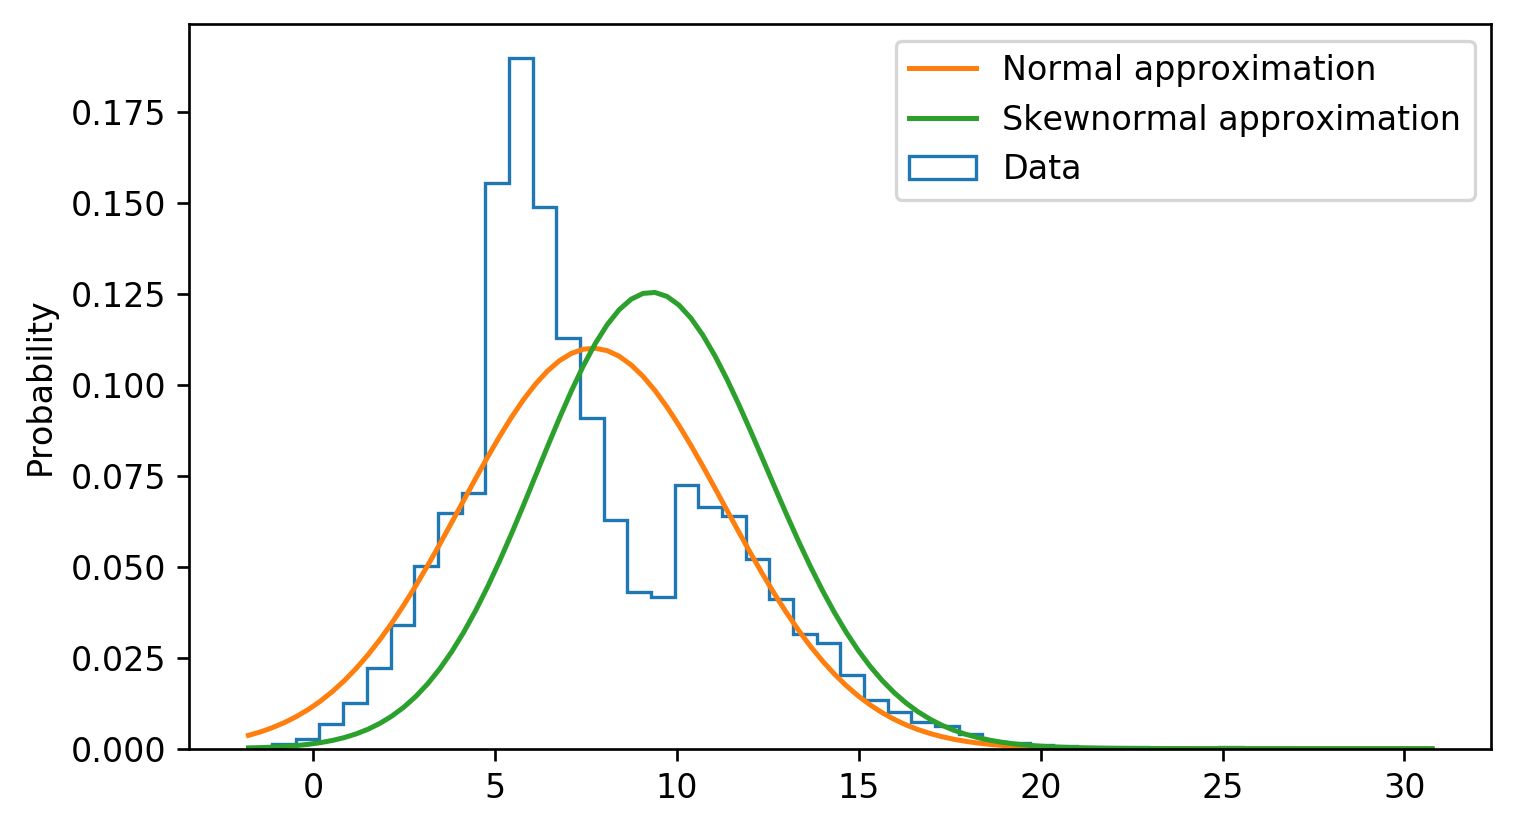

In [19]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Oh no, this doesn't look better? Where did we go wrong?

A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

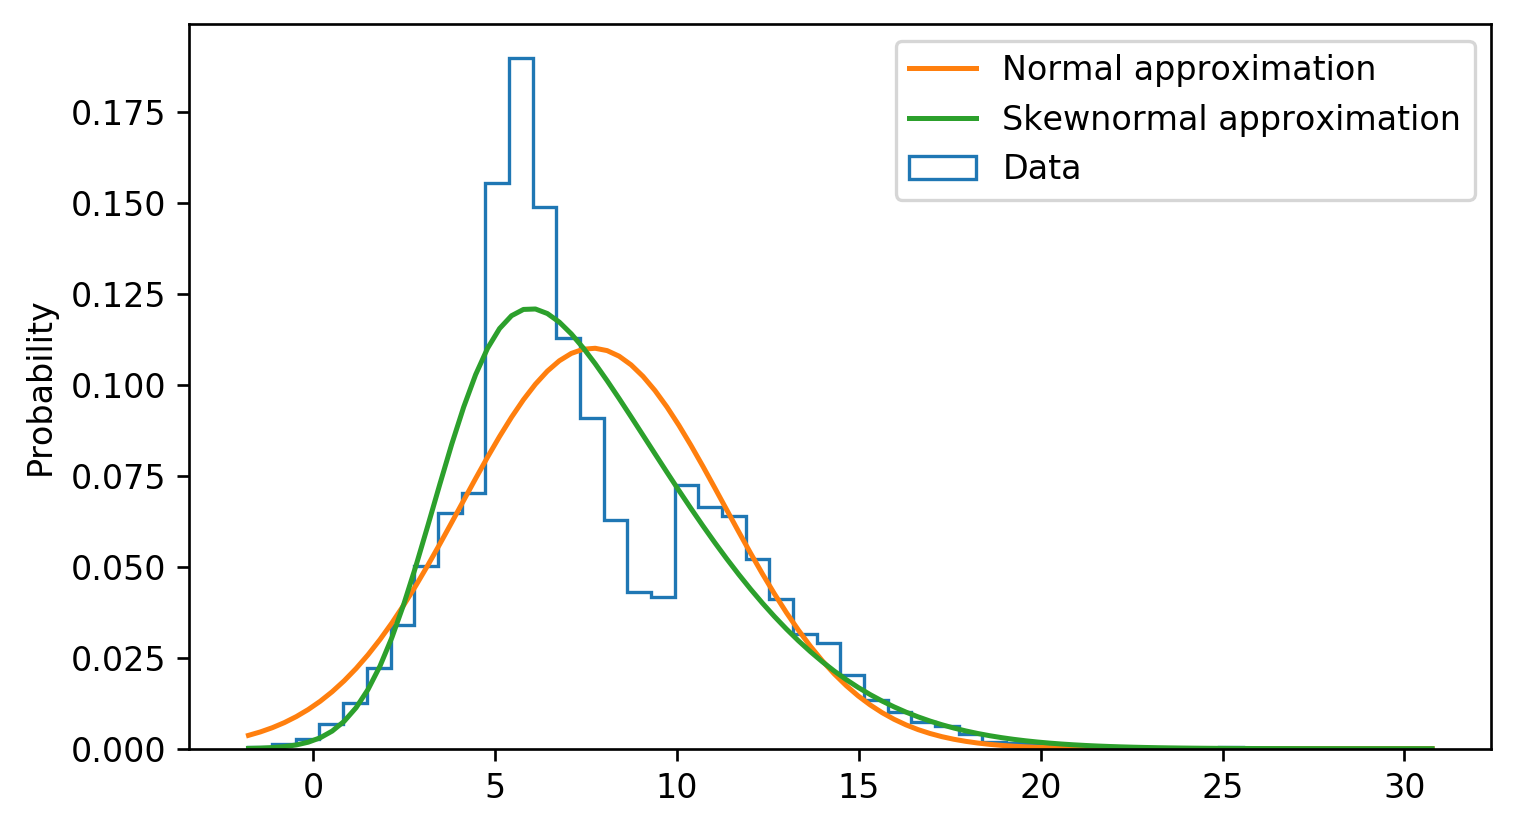

In [20]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### Kurtosis

In [47]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed/ (len(xs)))/ (var ** 2)

print(get_skewness([1,2,3,4,5]))

1.7


In [49]:
kurtosis = st.kurtosis(data, fisher = False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


## Percentiles

In [61]:
ps = np.linspace(0,100,10)
x_p = np.percentile(data, ps)

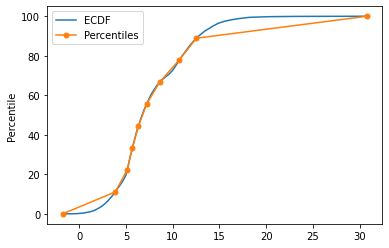

In [62]:
xs = np.sort(data)
ys = np.linspace(0,1,len(data))

plt.plot(xs, ys*100, label = "ECDF")
plt.plot(x_p, ps, label = "Percentiles", marker = ".", ms = 10)
plt.legend()
plt.ylabel("Percentile");

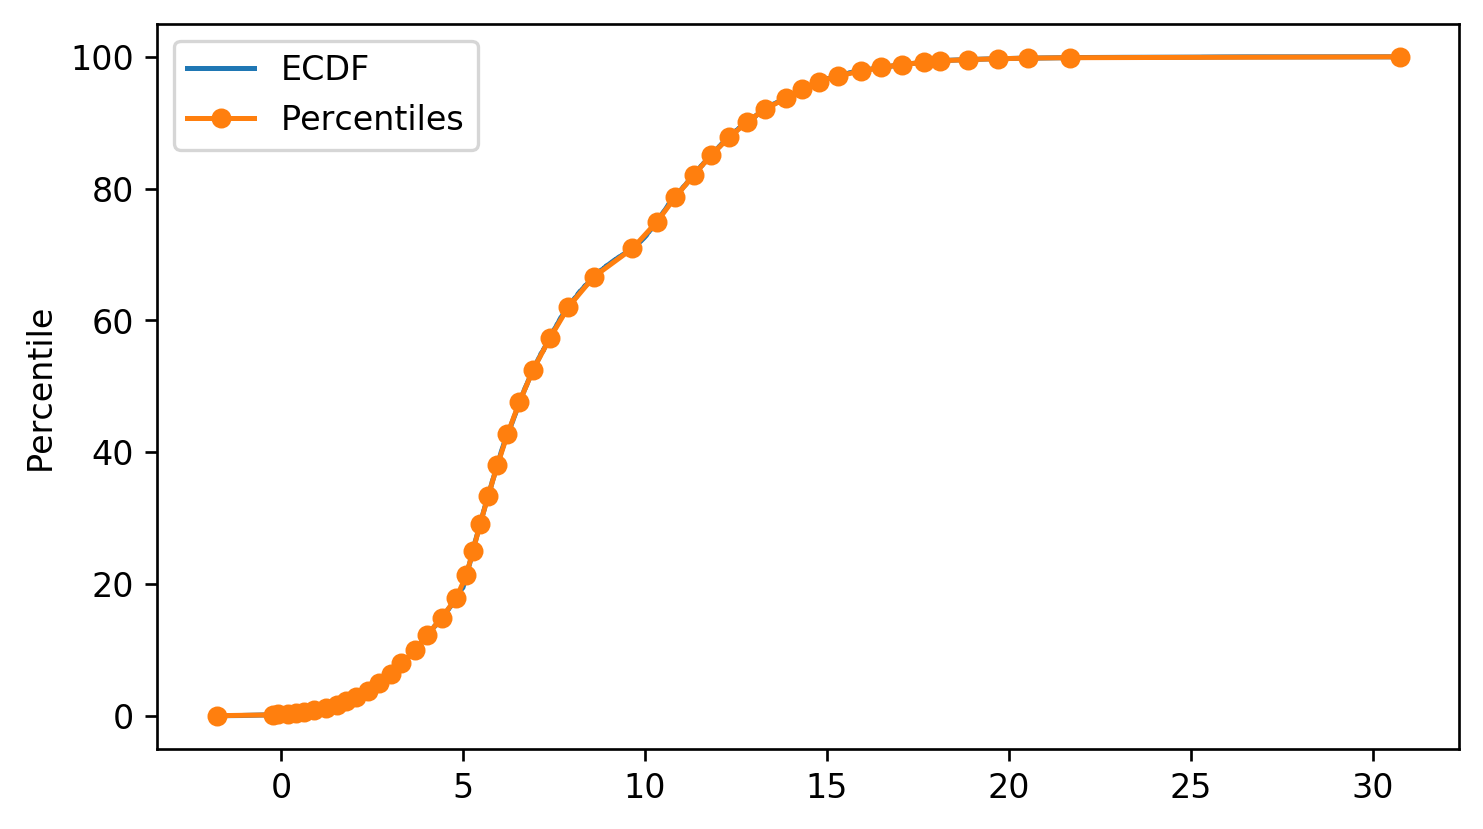

In [25]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

## Multivariate Distributions

#### Dataset

In [2]:
data_file = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\\
Python for Statistical Analysis\\CharacterisingND\\height_weight.csv"

dataset = pd.read_csv(data_file)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20


In [3]:
covariance = np.cov(dataset, rowvar = False)
print(covariance)

[[ 2.48453802e-01 -1.39113270e+00 -8.62700547e+00]
 [-1.39113270e+00  1.86020078e+01  7.85021810e+01]
 [-8.62700547e+00  7.85021810e+01  1.51291209e+03]]


In [4]:
covariance = dataset.cov()
print(covariance)

             sex     height       weight
sex     0.248454  -1.391133    -8.627005
height -1.391133  18.602008    78.502181
weight -8.627005  78.502181  1512.912088


In [6]:
corr = np.corrcoef(dataset)
print(corr)

[[1.         0.99340994 0.99504724 ... 0.99394439 0.98052571 0.95830421]
 [0.99340994 1.         0.99988295 ... 0.99998867 0.99657339 0.98474027]
 [0.99504724 0.99988295 1.         ... 0.99994446 0.99519127 0.98196241]
 ...
 [0.99394439 0.99998867 0.99994446 ... 1.         0.99616829 0.98390052]
 [0.98052571 0.99657339 0.99519127 ... 0.99616829 1.         0.99576057]
 [0.95830421 0.98474027 0.98196241 ... 0.98390052 0.99576057 1.        ]]


In [8]:
corr = dataset.corr()
corr

,sex,height,weight
sex,1.000000,-0.647092,-0.444970
height,-0.647092,1.000000,0.467945
weight,-0.444970,0.467945,1.000000


## Summary

Basically, start with the basics:
- Mean
- Standard Deviation

Use summary stats to approximate your dataset

Correlation and 1D statistics can go a long way to describe your dataset.